 <h1 align="center"> ¿5 variables son suficientes para predecir tu calificación?  </h1>

|                |   |
:----------------|---|
| **Nombres_alumnos**     | **Expedientes**|
| Emiliano Valderrama del Toro      | 744673  |
| Damarys Valenzuela Santos | 744494 |
| Camila Garcia Ornelas | 749725 |
| **Nombre_profesor**     | **Fecha**|
| GabrielL Alejandro Morales Ruiz | 29/09/25  |


## Objetivos

### Objetivo general
Aplicar modelos de **regresión supervisada** —**Random Forest** y **XGBoost**— al dataset *StudentsPerformance.csv* para **predecir el puntaje de matemáticas** de los estudiantes a partir de variables sociodemográficas y académicas, optimizando los **hiperparámetros** mediante **Optimización Bayesiana** con el fin de reducir el error cuadrático medio (RMSE) y mejorar la capacidad predictiva de los modelos.

### Objetivos específicos
- **Explorar y analizar el dataset** para comprender las relaciones entre variables como género, grupo étnico, nivel educativo parental, tipo de almuerzo y curso de preparación.  
- **Preprocesar los datos** mediante la codificación de variables categóricas (*One-Hot Encoding*) y la eliminación de columnas innecesarias para su uso en modelos de regresión.  
- **Entrenar un modelo de Random Forest** sin optimización y evaluar su rendimiento inicial a través de validación cruzada (*K-Fold*).  
- **Implementar la Optimización Bayesiana** sobre los hiperparámetros de Random Forest para identificar las combinaciones óptimas que minimicen el RMSE.  
- **Desarrollar un modelo de XGBoost** con y sin optimización para comparar su rendimiento frente al modelo de Random Forest.  
- **Analizar los hiperparámetros óptimos** obtenidos para cada modelo y explicar su impacto en la reducción del error y en la generalización del modelo.  
- **Comparar los resultados finales** entre Random Forest y XGBoost, destacando cuál logra una mejor predicción del desempeño académico de los estudiantes y por qué.  
- **Interpretar los resultados obtenidos**, identificando qué variables influyen con mayor peso en el puntaje de matemáticas y cómo los modelos capturan las interacciones entre ellas.

---


## Marco teórico

### 1.Regresión lineal
Método estadístico que modela la relación entre una variable de respuesta (conocida como variable dependiente (y)) y una o más predictoras (independientes (y)) mediante una función lineal. El objetivo de realizar este método es estimar los coeficientes que influyen en realizar las predicciones, así como de encontrar cuáles son las variables que más influencia tienen en la variable de respuesta.

#### 6 problemas potenciales en una regresión (ISLP)
- **No linealidad entre respuesta y factores**
Ocurre cuando la relación entre las variables no se puede representar muy bien por una función lineal. Esto provoca que no exista una buena o perfecta capacidad predicitva, lo cual generará un mal modeloñ
- **Correlación entre errores**
Sucede cuando los errores no son independientes, lo que provoca que generen estimaciones ineficientes y subestimen la varianza de los coeficientes.
- **Varianza no constante**
Aquí es donde entra lo que conocemos como homocedasticidad, la cual se viola cuando la variable de los errores cambia según el nivel de los predictores. Esto distorsiona los errores estándar y afecta la inferencia.
- **Outliers**
Estos son valores u observaciones que se alejan considerablemente del patrón que tienen los datos. La presencia de estos puede generar sesgos en los coeficientes y afectar la estabilidad del modelo, por ello es aconsejable descartarlos en determinadas ocasiones.
- **Puntos de palanca**
Se les llama así a observaciones con valores extremos en las variables independientes. Aunque no tengan residuos grandes, pueden influir en la estimación del modelo.
- **Colinealidad**
Sucede cuando dos o más predictores están altamente correlacionados. Esto hace que los coeficientes sean inestables y provoca la dificultad en interpretar la contribución de cada variable.

### 2. Árboles para regresión
Estos son modelos que predicen valores numéricos mediante una estructura jerárquica de decisiones, donde se rige de lo general a lo específico mediante la unión de ramas que conectan relaciones. En cada partición final, el modelo asigna el valor promedio de la variable respuesta.
Son interpretables, capturan relaciones no lineales y permite interacciones de forma natural.

### 3. Árboles para clasificación
Las árboles de clasificación son modelos que asignan una etiqueta de clase a cada observación. Funciona dividiendo el espacio de características en regiones homogéneas respecto a la variable objetivo. Son fáciles de interpretar y pueden manejar relaciones complejas entre variables.

### 4. Boostrap
Esta es una técnica de remuestreo que consiste en generar muchas muestras con reemplazo a partir de una muestra seleccionada del conjunto de datos original. El objetivo de esta técnica es estimar la variabilidad de un estadístico, aunque también se pueden construir intervalos de confianza o entrenar múltiples modelos.

### 5. Ensamble de modelos
El ensamble consiste en combinar varios modelos con el fin de mejorar el desempeño predictivo respecto a un solo modelo. El punto es que la combinación reduzca la varianza, el sesgo, o ambas cosas. Dentro de este ensamble entra el boostrap, bagging y random forests.

### 6. Bagging
Técnica de ensamble que entrena múltiples modelos sobre distintas muestras boostrap del conjunto original y promedia o vota sus predicciones dependiendo si se trate de regresión o clasificación. Su objetivo principal es reducir la varianza del modelo y mejorar su estabilidad, especialmente en modelos inestables como los árboles.

### 7. Boosting
Boosting es un método de ensamble secuancial donde cada modelo se entrena para corregir los errores del modelo anterior. En lugar de muestrear datos, se ajusten pesos para enfatizar las observaciones difíciles. Ayuda a producir modelos muy precisos, de bajo sesgo, lo único malo es que puede ser más susceptible al sobreajuste si no se regula adecuadamente.


### 8. Tema elegido para proyecto
####  Un buen disgnóstico puede salvar vidas


## Análisis del dataset

### ¿De dónde viene?
El dataset proviene de *Kaggle* y corresponde al conjunto de datos Students Performance in Exams. Este dataset es ampliamente utilizado para problemas de regresión y clasificación relacionados con el rendimiento académico. Contiene información demográfica, social y educativa de estudiantes, con el objetivo de analizar qué factores influyen en sus calificaciones en matemáticas, lectura y escritura.

Este conjunto de datos permite aplicar técnicas del marco teórico como *regresión lineal, **árboles de regresión, **Random Forest, **Boosting* y *XGBoost*, ya que combina variables categóricas y continuas que influyen de distinta manera en el rendimiento académico.

---

### ¿Qué contiene?
El dataset está compuesto por *1000 observaciones* y *7 variables*, cada una representando características individuales de cada estudiante. Las principales columnas incluyen:

- *gender:* género del estudiante.  
- *race/ethnicity:* grupo étnico al que pertenece.  
- *parental level of education:* nivel educativo de los padres.  
- *lunch:* tipo de almuerzo recibido (standard o free/reduced).  
- *test preparation course:* si el estudiante completó un curso de preparación.  
- *math score:* puntaje en matemáticas (variable objetivo).  
- *reading score / writing score:* puntajes complementarios en lectura y escritura.

El dataset combina variables categóricas y numéricas, lo que lo hace ideal para aplicar técnicas como *árboles de regresión, modelos de ensamble (Random Forest) y Boosting (XGBoost)*, donde los patrones no lineales y las interacciones pequeñas entre variables pueden ser relevantes.

---

### ¿Qué información dan las muestras?
Las muestras representan el desempeño académico de distintos estudiantes, junto con características sociales y educativas que podrían afectar sus resultados.  

A partir de estas observaciones es posible estudiar:

- Diferencias de rendimiento entre grupos étnicos.  
- La influencia del nivel educativo de los padres.  
- El impacto del acceso a almuerzo o recursos escolares.  
- El efecto del curso de preparación en los exámenes.  

Las muestras permiten conectar el marco teórico: por ejemplo, la *no linealidad entre factores y respuesta* se observa cuando pequeñas variaciones en variables sociales producen efectos no proporcionales en el rendimiento; asimismo, modelos como *árboles, bagging y boosting* capturan mejor estas relaciones que una regresión lineal tradicional.

---

### ¿Qué se quiere analizar?
El objetivo del análisis es *predecir el puntaje de matemáticas* (math score) a partir de los factores demográficos y educativos disponibles.  

Queremos identificar:

- Qué variables explican mejor el rendimiento en matemáticas.  
- Si existe una relación fuerte, débil o no lineal entre estas variables y el desempeño.  
- Si los modelos de ensamble como *Random Forest* y *XGBoost* pueden mejorar la capacidad predictiva frente a modelos tradicionales.  

También se busca determinar si el dataset presenta características del marco teórico, tales como:

- *No linealidad* entre factores y respuesta.  
- *Outliers* que impacten los modelos.  
- *Pequeños efectos marginales* que XGBoost puede capturar mejor.  
- *Interacciones simples*, lo cual explica por qué los árboles no requieren profundidades grandes.

En resumen, queremos estudiar si los factores sociales realmente influyen en el desempeño académico o si su efecto es limitado.

---

### ¿Qué variables se tienen que transformar para poder usarse en un modelo de regresión?
Dado que la mayoría de las variables son categóricas, es necesario transformarlas mediante *One Hot Encoding* para que puedan ser interpretadas por modelos de regresión y ensamble. Las variables que requieren transformación son:

- gender  
- race/ethnicity  
- parental level of education  
- lunch  
- test preparation course  

Este proceso genera múltiples columnas binarias que representan cada categoría. Esta transformación es fundamental para que modelos como *Random Forest* o *XGBoost* puedan identificar las interacciones entre estas características.

Además:

- No es necesario escalar las variables numéricas para árboles, dado que no dependen de la escala.  
- Sin embargo, la codificación categórica es esencial para evitar sesgos en la interpretación del modelo.

---

### ¿Qué resultado se podría encontrar al realizar una regresión?
Basándonos en el comportamiento observado en el código y en el marco teórico, se pueden anticipar los siguientes resultados:

- El dataset presenta *relaciones débiles y no lineales* entre las variables y el math score.  
- La regresión lineal no capturaría adecuadamente estos patrones por la presencia de pequeños efectos marginales.  
- *Random Forest*, al promediar muchos árboles poco profundos, captura relaciones moderadas pero no tan bien los efectos débiles.  
- *XGBoost*, al corregir los errores secuencialmente, logra identificar patrones más sutiles, lo cual explica por qué obtuvo un menor RMSE después de la optimización.

Resultados obtenidos en el proyecto:

- *Random Forest optimizado:* RMSE ≈ 13.68  
- *XGBoost optimizado:* RMSE ≈ 13.43  
- Mejores hiperparámetros XGBoost:  
  - n_estimators = 451  
  - max_depth = 2  
  - learning_rate ≈ 0.012  
  - subsample = 0.5  
  - colsample_bytree = 0.5

Esto nos indica que:

- *El dataset no requiere árboles profundos*, pues las interacciones son simples.  
- *Un learning rate pequeño* permite mejorar el rendimiento evitando sobreajuste.  
- *XGBoost supera a Random Forest* al capturar efectos pequeños que RF no detecta tan bien.  

En conclusión, el modelo XGBoost logra *una menor variación entre predicción y valor real*, obteniendo la mejor precisión para este conjunto de datos.

---

## PIPELINE

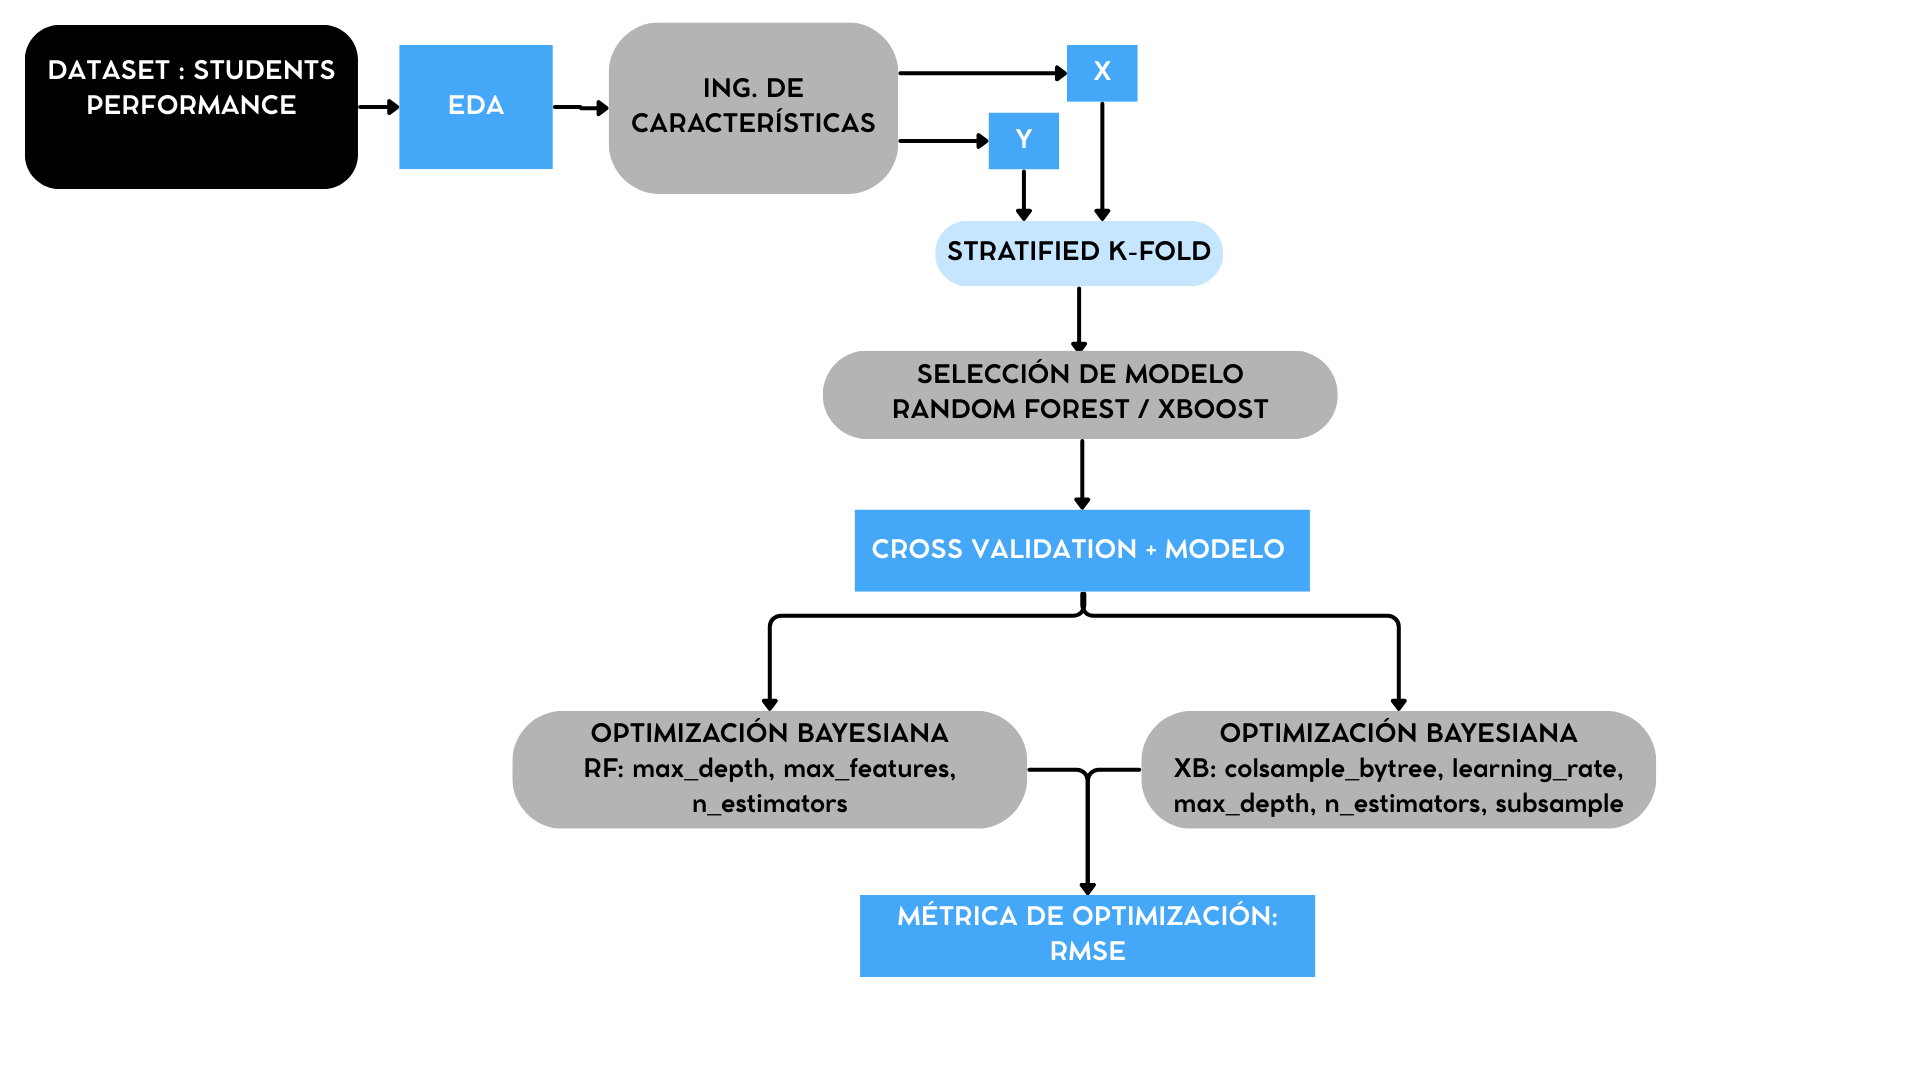

In [ ]:
pip install xgboost

In [ ]:
pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical, Real
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


In [ ]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
X = df[['gender','race/ethnicity','parental level of education','lunch','test preparation course']]
y = df['math score']

X = pd.get_dummies(X, drop_first=True)

# Random Forest sin optimización

In [ ]:
rf = RandomForestRegressor(
    random_state=42,
    n_estimators=200,
    max_depth=6,
    max_features='sqrt'
)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(
    rf, X, y,
    cv=kfold,
    scoring='neg_root_mean_squared_error'
)

print("RMSE promedio:", -scores.mean())
print("Desviación estándar:", scores.std())

RMSE promedio: 13.793212052848784
Desviación estándar: 0.51420889261692


Antes de realizar la optimización podemos ver que el modelo tiene un error promedio de 13.79, diciendonos que en cada predicción tiene la posibilidad de variar esta cantidad considerando que la calificación va de 0-100.
Y en cuanto a la desviación estándar nos diceq qué tanta variación hubo en el rendimiento de los 5 kfolds, la cual podríamos decir que se encuentra moderada.

# Random Forest con optimización

In [ ]:
search_spaces = {
    'n_estimators': Integer(50, 500),
    'max_depth': Integer(2, 20),
    'max_features': Categorical(['sqrt', 'log2'])
}


In [ ]:
rf = RandomForestRegressor(
    random_state=42,
    bootstrap=True
)


In [ ]:
opt = BayesSearchCV(
    estimator=rf,
    search_spaces=search_spaces,
    n_iter=30,
    cv=kfold,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)


In [ ]:
opt.fit(X, y)


/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(4), np.str_('sqrt'), np.int64(500)] before, using random point [np.int64(9), 'sqrt', np.int64(255)]
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(4), np.str_('sqrt'), np.int64(500)] before, using random point [np.int64(18), 'sqrt', np.int64(354)]
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(4), np.str_('sqrt'), np.int64(500)] before, using random point [np.int64(19), 'sqrt', np.int64(410)]
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(4), np.str_('sqrt'), np.int64(500)] before, using random point [np.int64(11), 'sqrt', np.in

BayesSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
              estimator=RandomForestRegressor(random_state=42), n_iter=30,
              n_jobs=-1, random_state=42, scoring='neg_mean_squared_error',
              search_spaces={'max_depth': Integer(low=2, high=20, prior='uniform', transform='normalize'),
                             'max_features': Categorical(categories=('sqrt', 'log2'), prior=None),
                             'n_estimators': Integer(low=50, high=500, prior='uniform', transform='normalize')})

In [ ]:
print("Mejores hiperparámetros encontrados:")
print(opt.best_params_)

best_mse = -opt.best_score_
best_rmse = np.sqrt(best_mse)

print("Mejor MSE (promedio CV):", best_mse)
print("Mejor RMSE (promedio CV):", best_rmse)

Mejores hiperparámetros encontrados:
OrderedDict({'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 500})
Mejor MSE (promedio CV): 187.39915139435098
Mejor RMSE (promedio CV): 13.689380971919475


Luego de optimizar los parámetros que se tendrán son: 5000 árboles donde la profundidad de cada uno se reducirá a 4 niveles. Luego en estos niveles del árbol se usará raíz del número de variables, lo cual introduce aleatoriedad y reduce sobreajuste.

Utilizando estos hiperparámetros se redujo un poco el error, lo cual nos dice lo funcional que es usar optimización para mejorar la capacidad productiva del modelo y reducir el porcentaje de error. No se redujo tanto puesto que el data set no tiene muchas variables, además la mayoría de estas son categóricas y no no proporcionan tanta información al score real.



# XGBoost sin optimización

In [ ]:
xgb = XGBRegressor(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=1,
    colsample_bytree=1,
    random_state=42,
    objective='reg:squarederror'
)


In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


In [ ]:
scores = cross_val_score(
    xgb,
    X, y,
    cv=kfold,
    scoring='neg_root_mean_squared_error'  # RMSE (negativo)
)

print("XGB RMSE promedio:", -scores.mean())
print("Desviación estándar:", scores.std())


XGB RMSE promedio: 14.301362228393554
Desviación estándar: 0.6482175178046086


Antes de realizar la optimización vemos que el error se encuentra por encima del Random Forest, tanto de antes como después de optimizar. Además, la desviación también está por encima.

#XGBoots con optimización

In [ ]:
xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

In [ ]:
search_spaces_xgb = {
    'n_estimators': Integer(50, 500),          # nº de árboles
    'max_depth': Integer(2, 10),              # profundidad máxima
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),  # tasa aprendizaje
    'subsample': Real(0.5, 1.0),              # filas por árbol
    'colsample_bytree': Real(0.5, 1.0)        # columnas por árbol
}

In [ ]:
opt_xgb = BayesSearchCV(
    estimator=xgb,
    search_spaces=search_spaces_xgb,
    n_iter=30,
    cv=kfold,
    scoring='neg_mean_squared_error',  # trabajamos con MSE
    n_jobs=-1,
    random_state=42
)

In [ ]:
opt_xgb.fit(X, y)

BayesSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
              estimator=XGBRegressor(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     imp...
              search_spaces={'colsample_bytree': Real(low=0.5, high=1.0, prior='uniform', transform='normalize'),
                             'learning_rate': Real(low=0.01, high=0.3, prior='log-uniform', transform='normalize'),
                             'max_depth': Integer(low=2, high=10, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=50, high=500, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

In [ ]:
print("Mejores hiperparámetros XGBoost:")
print(opt_xgb.best_params_)

best_mse_xgb = -opt_xgb.best_score_
best_rmse_xgb = np.sqrt(best_mse_xgb)

print("Mejor MSE XGB (promedio CV):", best_mse_xgb)
print("Mejor RMSE XGB (promedio CV):", best_rmse_xgb)

Mejores hiperparámetros XGBoost:
OrderedDict({'colsample_bytree': 0.5, 'learning_rate': 0.012380577008007227, 'max_depth': 2, 'n_estimators': 451, 'subsample': 0.5})
Mejor MSE XGB (promedio CV): 180.51858215332032
Mejor RMSE XGB (promedio CV): 13.435720380884693


Terminando con este modelo, obtuvimos un mejor score minimizándose aún más el error promedio, que igualmente no fue tanto pero al menos se logró mejorar el poder predictivo un poco. Además, sí que se vuelve significativo en modelos con este rango de datos.

Los hiperparámetros optimizados fueron los siguiente:
Se obtuvo que el número de columnas a utilizarse serán 0.5.
La distribución logarítmica fue de 0.01 lo cual no está mal, puesto que ayuda a reducir sobreajuste.
Cantidad de árboles es de 451 y el nivel máximo de 2.
Y por último el porcentaje de filas usadas por cada árbol es de 0.5.

Comparando el desempeño de RF y XGBoost primeramente es fundamental analizar nuestro data set, donde podemos notar que la relación entre las categorías y el "math score" es un tanto débil, no lineal y con pequeños efectos marginales. Por lo tanto, el modelo de XGBoost es mejor capturando efectos pequeños y combinaciones no obvias porque construye árboles secuencialmente, y en cada va corrigiendo los errores del anterior. En contraste, Random Forest solo promedia árboles independientes, donde sí capta relaciones fuertes, pero no tan bien las débiles.

Además, viendo los hiperparámetros optmizados XGB descubrió que no es necesario tener árboles muy profundos, puesto que al tener nivel de 2 fue suficiente y mejor para el score. Esto indica que el data set no tiene interacciones profundas. En random forest se llegó al nivel 5 de profundidad lo cual agregó complejidad y ruido innecesario.

Es muy importante fijarnos en el learning rate puesto que al ser tan pequeño nos dice que cada árbol está aportando muy poca información. XBoost refina el mdoelo con delicadez y evita completamente el sobreajuste, tomado cada partecita de cada árbol y mejorandola cada vez más.

Por lo tanto, para nuestro caso XBoost tuvo mejores resultados, menor error y sesgo.

In [ ]:
best_xgb = opt_xgb.best_estimator_

Al final simplemente almacenamos el mejor modelo ya entrenado y con los mejores hiperparámetros.

## Conclusiones

En este proyecto se llevaron a cabo dos modelos diferentes: Random Forest y Xboost. Ambos nos ayudan a mejorar la capacidad predictiva del modelo con ayuda de la creación de muchos árboles de regresión, donde cada uno proporciona información útil e importante para el rendimiento del modelo.
Además, fue necesaria la adición de optimización bayesiana para la mejora de los hiperparámetros que cada modelo contiene.

La optimización bayesiana es muy útil pues nos quita mucho trabajo de encima. Es una técnica que analiza los posibles coeficientes de cada hiperparámetro intentando encontrar el mejor considerando la métrica que más nos convenga. En este caso fue elegido el error cuadrático medio (RMSE), esto por su facilidad de interpretación y por la escala en la que se encuentra, la cual se alinea con nuestra variable de respuesta. Este error nos indicará que tanto varía nuestra predicción del valor real. El mejor obtenido fue de 13.43 con la optimización bayesiana del modelo de XBoost.

Tanto Random Forest como XBoost son buenas técnicas de regresión, pero su uso depende de los datos que tengamos. En este caso, cada variable aportaba poca información, por eso que la profundidad de los árboles en este modelo no fue tan grande. XBoost ayudó a encontrar estos detalles en cada árbol y a ir corrigiendo los erorres que encontrara en cada uno, por ello que se obtuvieron también una cantidad considerable de árboles.
El hiperparámetro de **information rate** es el que nos ayudó a identificar cómo se encuentra la información en nuestro modelo, y la razón por la cual XBoost se adaptó más a nuestros datos ya que es mejor capturando efectos pequeños y combinaciones no obvias al construir árboles secuenciales y corrigiendo los errores del anterior. Y a diferencia de este modelo, Random Forest solo promedia árboles independientes, donde sí capta relaciones fuertes, pero no tan bien las débiles.

A pesar de tener la idea de que las variables de nuestro data set no son las mejores para predecir la calificación de una materia, se observó que pueden ser significativas y con los modelos utilizados pudimos obtener un buen resultado y un error promedio bajo, lo cual nos puede ayudar a realizar esta predicción.
Como lo hemos visto en pasadas ocasiones, entre más información tengamos siempre será mejor para nuestros modelos. Dependerá mucho el modelo a elegir considerando la información que tengamos, pero además, un amplio y profundo análisis de los datos siempre será necesario e importante antes de comenzar cualquier proceso de modelaje o predicción.

## PRESENTACIÓN

https://drive.google.com/file/d/1WJ0OKJgHity9R5v1rF1_sdBsaaPH4Gas/view?usp=sharing